In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns
from openpyxl import load_workbook

def slicydicy(word):
    word= word.split('|')[2]
    word=word.split(':')[0]
    word=word.split('_')[0]
    return word

In [3]:
mapp='peptide_sample_WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
WF_samples=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data
    print(file+': '+str(len(data['Peptide'])))
    WF_samples.append(data['Peptide'])

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
non_inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data
    non_inf_patients.append(data['Peptide'])

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Accession'].fillna("Not available", inplace = True) 
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data
    inf_patients.append(data['Peptide'])

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


peptide _WF1.xlsx: 811
peptide_WF2.xlsx: 934
peptide_WF3.xlsx: 900
peptide_WF4.xlsx: 572
peptide_WF5.xlsx: 846


In [4]:
g=(0.4, 0.7607843137254902, 0.6470588235294118)
r=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
l=(0.5529411764705883, 0.6274509803921569, 0.796078431372549)
p=(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)
lg=(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)
y=(1.0, 0.8509803921568627, 0.1843137254901961)

color=[r,p,y]

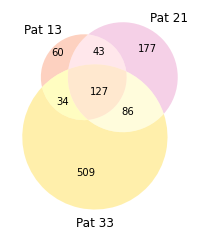

In [5]:
v=venn3([set(non_inf_patients[0]),set(non_inf_patients[1]),set(non_inf_patients[2])], set_labels=('Pat 13','Pat 21','Pat 33'), set_colors=color)

#plt.savefig('inf_venn.svg', transparent=True)

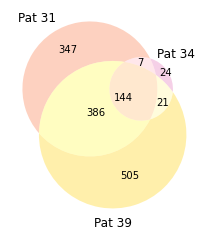

In [5]:
venn3([set(inf_patients[0]),set(inf_patients[1]),set(inf_patients[2])], set_labels=('Pat 31', 'Pat 34','Pat 39'), set_colors=color)
#plt.savefig('ninf_venn.svg', transparent=True)

In [126]:

df_WF_all=pd.DataFrame()
df_WF_all['Peptide']=df_WF['Peptide']
df_WF = df_WF.groupby(['Accession','Peptide']).sum()
df_WF.reset_index(['Peptide'], inplace=True)
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['count','#Feature'], ascending=False)

#Non-infected patients
df_ninf_all=pd.DataFrame()
df_ninf_all['Peptide']=df_ninf['Peptide']

df_ninf = df_ninf.groupby(['Accession','Peptide']).sum()
df_ninf.reset_index(['Peptide'], inplace=True)
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['count','#Feature'], ascending=False)

#infected patients
df_inf_all=pd.DataFrame()
df_inf_all['Peptide']=df_inf['Peptide']

df_inf = df_inf.groupby(['Accession','Peptide']).sum()
df_inf.reset_index(['Peptide'], inplace=True)
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['count','#Feature'], ascending=False)

In [127]:
df_ninf_same=df_ninf.loc[(df_ninf['count']==3)]
df_WF_same=df_WF.loc[(df_WF['count']==5)]

df_WF_ninf=df_WF_same.append(df_ninf_same)
df_WF_ninf.reset_index()
df_WF_ninf=df_WF_ninf.groupby(['Accession','Peptide']).sum()
df_WF_ninf.sort_values(['count','#Feature'], ascending=False)
df_WF_same

,Peptide,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count
Accession,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,160,23.0,8.0,38.0,52.0,38.0,5
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,65,12.0,12.0,16.0,18.0,7.0,5
sp|P06727|APOA4_HUMAN,NHQLEGLTF,58,9.0,11.0,10.0,15.0,13.0,5
sp|Q14624|ITIH4_HUMAN,NFRPGVL,58,13.0,13.0,14.0,6.0,12.0,5
sp|Q14624|ITIH4_HUMAN,SRQLGLPGPPDVPDHA,56,12.0,14.0,11.0,8.0,11.0,5
...,...,...,...,...,...,...,...,...
sp|P35579|MYH9_HUMAN,DLPFVVPR,20,4.0,4.0,4.0,4.0,4.0,5
sp|P69905|HBA_HUMAN,FPHFDLS,20,4.0,4.0,4.0,4.0,4.0,5
sp|P69905|HBA_HUMAN,MFLSFPTTK,20,4.0,4.0,4.0,4.0,4.0,5


Text(0.5, 1.0, 'WF intersection as part of total WF')

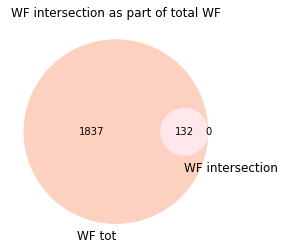

In [8]:
venn2([set(df_WF_all['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('WF tot', 'WF intersection'), set_colors=color)
plt.title('WF intersection as part of total WF')

Text(0.5, 1.0, 'WF vs non-infected overlap')

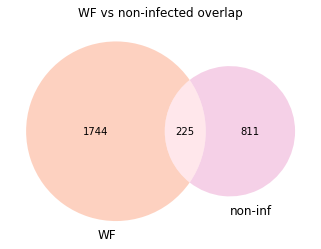

In [9]:
venn2([set(df_WF['Peptide']), set(df_ninf['Peptide'])], set_labels = ('WF', 'non-inf'), set_colors=color)
plt.title('WF vs non-infected overlap')

In [134]:
df_inf_same=df_inf.loc[(df_inf['count']==3)]

df_ninf_inf=df_ninf_same.append(df_inf_same)
df_ninf_inf.reset_index()
df_ninf_inf=df_ninf_inf.groupby(['Accession','Peptide']).sum()
df_ninf_inf=df_ninf_inf.sort_values(['count','#Feature'], ascending=False)
df_ninf_inf['Fold Change']=(df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])/(df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])
df_ninf_inf['Difference (ninf-inf)']=((df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])/3)-((df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])/3)
df_ninf_inf=df_ninf_inf.sort_values(['Difference (ninf-inf)'], ascending=True)
df_ninf_inf.reset_index(inplace=True)
df_ninf_inf['std ninf']=df_ninf_inf[['#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33']].std(axis = 1, ddof=1, skipna = True) 
df_ninf_inf['std inf']=df_ninf_inf[['#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39']].std(axis = 1, ddof=1, skipna = True)
df_ninf_inf[0:30]

,Accession,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,Fold Change,Difference (ninf-inf),std ninf,std inf
0,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,150,11.0,12.0,18.0,6,37.0,12.0,60.0,2.658537,-22.666667,3.785939,24.006943
1,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,152,13.0,13.0,17.0,6,42.0,12.0,55.0,2.534884,-22.000000,2.309401,22.052967
2,sp|P68871|HBB_HUMAN,SDGLAHLDNLKGTFA,56,0.0,0.0,0.0,3,22.0,6.0,28.0,inf,-18.666667,0.000000,11.372481
3,sp|P68871|HBB_HUMAN,VHLTPEEKSAV,102,8.0,8.0,8.0,6,28.0,14.0,36.0,3.250000,-18.000000,0.000000,11.135529
4,sp|P69905|HBA_HUMAN,AHVDDMPNALSAL,54,0.0,0.0,0.0,3,22.0,13.0,19.0,inf,-18.000000,0.000000,4.582576
5,sp|P68871|HBB_HUMAN,DGLAHLDNLKGTFA,53,0.0,0.0,0.0,3,21.0,5.0,27.0,inf,-17.666667,0.000000,11.372481
6,sp|P69905|HBA_HUMAN,STVLTSKYR,102,8.0,7.0,10.0,6,21.0,15.0,41.0,3.080000,-17.333333,1.527525,13.613719
7,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,140,8.0,12.0,26.0,6,33.0,9.0,52.0,2.043478,-16.000000,9.451631,21.548395
8,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,SDGLAHLDNLKGTF,45,0.0,0.0,0.0,3,23.0,6.0,16.0,inf,-15.000000,0.000000,8.544004
9,sp|P69905|HBA_HUMAN,SVSTVLTSKYR,45,0.0,0.0,0.0,3,18.0,4.0,23.0,inf,-15.000000,0.000000,9.848858


,Accession,_merge,Peptide
0,sp|P68871|HBB_HUMAN,left_only,EVGGEALGRLLV
1,sp|P02768|ALBU_HUMAN,left_only,ASQAALGL
2,sp|P69905|HBA_HUMAN,left_only,TNAVAHVDDMPNALSAL
3,sp|P62805|H4_HUMAN,left_only,FLENVIRDAVTY
4,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,left_only,HLDNLKGT
5,sp|P69905|HBA_HUMAN,left_only,GKVGAHAGEYGAEALER
6,sp|P69905|HBA_HUMAN,left_only,VADALTNAV
7,sp|P02652|APOA2_HUMAN,left_only,SPELQAEAK
8,sp|P68871|HBB_HUMAN,left_only,HLDNLKGTFA
9,sp|P69905|HBA_HUMAN,left_only,VDDMPNALSAL


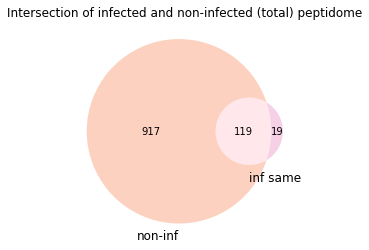

In [11]:
venn2([set(df_ninf['Peptide']), set(df_inf_same['Peptide'])], set_labels = ('non-inf', 'inf same'), set_colors=color)
plt.title('Intersection of infected and non-infected (total) peptidome')
biomarker=df_inf_same.merge(df_ninf, on=['Peptide','Accession'], indicator= True, how='outer')
biomarker=biomarker[['_merge','Peptide']].sort_values('_merge')
biomarker=biomarker.loc[(biomarker['_merge']=='left_only')]
biomarker.reset_index(inplace=True)
biomarker

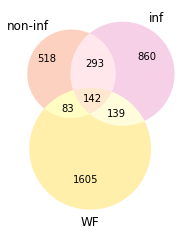

In [12]:
v=venn3([set(df_ninf['Peptide']), set(df_inf['Peptide']), set(df_WF['Peptide'])], set_labels = ('non-inf', 'inf', 'WF'), set_colors=color)

#plt.savefig('tot_tot_venn.svg', transparent=True)

# To heatmap


In [113]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data


df_inf['count']=1
df_inf= df_inf.groupby(['Peptide'], as_index=False).sum()
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['Peptide'])


mapp='WF'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data


df_WF['count']=1
df_WF= df_WF.groupby(['Peptide'], as_index=False).sum()
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['Peptide'])
df_WF

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data.dropna(subset=['Accession'], inplace=True, how='any')
    data['Accession']=data['Accession'].apply(lambda x: slicydicy(x))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)]
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data


df_ninf['count']=1
df_ninf= df_ninf.groupby(['Peptide'], as_index=False).sum()
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['Peptide'])
df_inf

,Peptide,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count
0,AAHLPAEF,4,4.0,0.0,0.0,1
1,AAHLPAEFTPA,8,4.0,0.0,4.0,2
2,AAHLPAEFTPAV,12,4.0,4.0,4.0,3
3,AAHLPAEFTPAVH,19,7.0,4.0,8.0,3
4,AAHLPAEFTPAVHA,23,8.0,4.0,11.0,3
...,...,...,...,...,...,...
1395,YQKVVAGVAN,4,0.0,0.0,4.0,1
1396,YQKVVAGVANA,4,0.0,0.0,4.0,1
1397,YQKVVAGVANAL,8,4.0,0.0,4.0,2
1398,YQKVVAGVANALA,4,4.0,0.0,0.0,1


In [116]:
heatmap_inf=pd.read_excel('heatmap.xlsx',sheet_name='inf')
heatmap_ninf=pd.read_excel('heatmap.xlsx',sheet_name='ninf')
heatmap_WF=pd.read_excel('heatmap.xlsx',sheet_name='WF')

heatmap_ninf=heatmap_ninf.rename(columns={'Seq':'Peptide'})
heatmap_inf=heatmap_inf.rename(columns={'Seq':'Peptide'})
heatmap_WF=heatmap_WF.rename(columns={'Seq':'Peptide'})


In [117]:
heatmap_inf=heatmap_inf.merge(df_inf, on='Peptide', how='inner')
heatmap_ninf=heatmap_ninf.merge(df_ninf, on='Peptide', how='inner')
heatmap_WF=heatmap_WF.merge(df_WF, on='Peptide', how='inner')
heatmap_inf

,Seq ID,Peptide,Anti-Microbial,Deep-AmPEP30,RF-AmPEP30,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count
0,0,AAHLPAEF,0.43,0.210585,0.464167,4,4.0,0.0,0.0,1
1,1,AAHLPAEFTPA,0.35,0.214085,0.425833,8,4.0,0.0,4.0,2
2,2,AAHLPAEFTPAV,0.51,0.301519,0.452500,12,4.0,4.0,4.0,3
3,3,AAHLPAEFTPAVH,0.45,0.330300,0.465000,19,7.0,4.0,8.0,3
4,4,AAHLPAEFTPAVHA,0.44,0.403371,0.500833,23,8.0,4.0,11.0,3
...,...,...,...,...,...,...,...,...,...,...
1395,1429,YQKVVAGVAN,0.76,0.524316,0.435000,4,0.0,0.0,4.0,1
1396,1430,YQKVVAGVANA,0.79,0.591136,0.434167,4,0.0,0.0,4.0,1
1397,1431,YQKVVAGVANAL,0.81,0.550833,0.433333,8,4.0,0.0,4.0,2
1398,1432,YQKVVAGVANALA,0.82,0.559647,0.462500,4,4.0,0.0,0.0,1


In [118]:
heatmap_WF=heatmap_WF.loc[(heatmap_WF['Deep-AmPEP30']>=0.7)]
heatmap_inf=heatmap_inf.loc[(heatmap_inf['Deep-AmPEP30']>=0.7)]
heatmap_ninf=heatmap_ninf.loc[(heatmap_ninf['Deep-AmPEP30']>=0.7)]
heatmap_inf.sort_values('#Feature', ascending=False)

,Seq ID,Peptide,Anti-Microbial,Deep-AmPEP30,RF-AmPEP30,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count
66,67,AGVANALAHKYH,0.11,0.892151,0.613333,109,37.0,12.0,60.0,3
518,521,GVANALAHKYH,0.51,0.890835,0.594167,109,42.0,12.0,55.0,3
125,126,ANALAHKYH,0.11,0.808967,0.600000,94,33.0,9.0,52.0,3
818,827,NALAHKYH,0.07,0.804693,0.592500,57,17.0,4.0,36.0,3
1202,1233,VAGVANALAHKYH,0.39,0.895293,0.646667,53,17.0,8.0,28.0,3
...,...,...,...,...,...,...,...,...,...,...
499,502,GNPKVKAHGKKVLGA,0.58,0.744817,0.757500,4,4.0,0.0,0.0,1
1033,1063,SLHTLFGDK,0.52,0.803894,0.549167,4,0.0,4.0,0.0,1
1035,1065,SLPLPNFS,0.42,0.711014,0.525833,4,0.0,0.0,4.0,1
464,467,GHGKKVADALT,0.58,0.717327,0.622500,4,4.0,0.0,0.0,1


In [17]:

heatmap_inf['avg feat']=heatmap_inf['#Feature']/3
heatmap_ninf['avg feat']=heatmap_ninf['#Feature']/3
heatmap_WF['avg feat']=heatmap_WF['#Feature']/5

inf=heatmap_inf['avg feat']*heatmap_inf['Deep-AmPEP30']
ninf=heatmap_ninf['avg feat']*heatmap_ninf['Deep-AmPEP30']
WF=heatmap_WF['avg feat']*heatmap_WF['Deep-AmPEP30']
inf=inf.sort_values(ascending=False)
ninf=ninf.sort_values(ascending=False)
WF=WF.sort_values(ascending=False)
WF.dropna()
sum(heatmap_ninf['#Feature'])

708

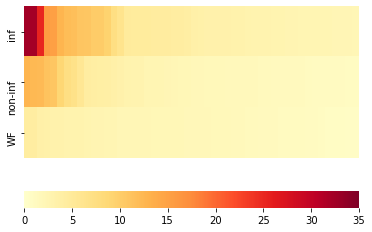

In [18]:
inf=inf[0:50]
ninf=ninf[0:50]
WF=WF[0:50]
ytick=['inf','non-inf','WF']
ax = sns.heatmap([inf,ninf, WF] ,vmin=0, vmax=35,cmap="YlOrRd", yticklabels=ytick, xticklabels=False,
                 cbar_kws={"orientation": "horizontal"})
fig = ax.get_figure()
fig.savefig("heatmap.svg", transparent=True)

In [19]:
heatmap_WF

,Seq ID,Peptide,Anti-Microbial,Deep-AmPEP30,RF-AmPEP30,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,avg feat
52,52,AGVANALAHKYH,0.11,0.892151,0.613333,15,4.0,5.0,0.0,0.0,6.0,3,3.0
68,68,ALAHKYH,0.36,0.915093,0.655833,5,0.0,0.0,0.0,0.0,5.0,1,1.0
115,115,ASTGKTFPGFFSPM,0.35,0.861225,0.538333,4,4.0,0.0,0.0,0.0,0.0,1,0.8
116,116,ASTGKTFPGFFSPMLGEFV,0.54,0.838952,0.532500,19,4.0,5.0,6.0,4.0,0.0,4,3.8
118,118,ATAVKITLL,0.33,0.718098,0.734167,4,0.0,0.0,0.0,0.0,4.0,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1908,WGKVGAHAGEY,0.72,0.718239,0.546667,4,0.0,0.0,0.0,0.0,4.0,1,0.8
1917,1917,YDKSLWDFLKLDV,0.73,0.884308,0.593333,9,5.0,4.0,0.0,0.0,0.0,2,1.8
1929,1929,YFPHFDLSHG,0.51,0.708865,0.421667,30,9.0,8.0,6.0,0.0,7.0,4,6.0
1930,1930,YFPHFDLSHGS,0.49,0.783443,0.404167,5,5.0,0.0,0.0,0.0,0.0,1,1.0


In [119]:

heatmap_inf['AMS1']=heatmap_inf['#Feature Sample 31']*heatmap_inf['Deep-AmPEP30']
heatmap_inf['AMS2']=heatmap_inf['#Feature Sample 34']*heatmap_inf['Deep-AmPEP30']
heatmap_inf['AMS3']=heatmap_inf['#Feature Sample 39']*heatmap_inf['Deep-AmPEP30']

heatmap_ninf['AMS1']=heatmap_ninf['#Feature Sample 13']*heatmap_ninf['Deep-AmPEP30']
heatmap_ninf['AMS2']=heatmap_ninf['#Feature Sample 21']*heatmap_ninf['Deep-AmPEP30']
heatmap_ninf['AMS3']=heatmap_ninf['#Feature Sample 33']*heatmap_ninf['Deep-AmPEP30']

heatmap_WF['AMS1']=heatmap_WF['#Feature WF1']*heatmap_WF['Deep-AmPEP30']
heatmap_WF['AMS2']=heatmap_WF['#Feature WF2']*heatmap_WF['Deep-AmPEP30']
heatmap_WF['AMS3']=heatmap_WF['#Feature WF 3']*heatmap_WF['Deep-AmPEP30']
heatmap_WF['AMS4']=heatmap_WF['#Feature WF4']*heatmap_WF['Deep-AmPEP30']
heatmap_WF['AMS5']=heatmap_WF['#Feature WF5']*heatmap_WF['Deep-AmPEP30']

heatmap_WF

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Seq ID,Peptide,Anti-Microbial,Deep-AmPEP30,RF-AmPEP30,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,AMS1,AMS2,AMS3,AMS4,AMS5
51,52,AGVANALAHKYH,0.11,0.892151,0.613333,15,4.0,5.0,0.0,0.0,6.0,3,3.568604,4.460755,0.000000,0.000000,5.352906
67,68,ALAHKYH,0.36,0.915093,0.655833,5,0.0,0.0,0.0,0.0,5.0,1,0.000000,0.000000,0.000000,0.000000,4.575465
111,115,ASTGKTFPGFFSPM,0.35,0.861225,0.538333,4,4.0,0.0,0.0,0.0,0.0,1,3.444900,0.000000,0.000000,0.000000,0.000000
112,116,ASTGKTFPGFFSPMLGEFV,0.54,0.838952,0.532500,19,4.0,5.0,6.0,4.0,0.0,4,3.355808,4.194760,5.033712,3.355808,0.000000
114,118,ATAVKITLL,0.33,0.718098,0.734167,4,0.0,0.0,0.0,0.0,4.0,1,0.000000,0.000000,0.000000,0.000000,2.872392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,1908,WGKVGAHAGEY,0.72,0.718239,0.546667,4,0.0,0.0,0.0,0.0,4.0,1,0.000000,0.000000,0.000000,0.000000,2.872956
1837,1917,YDKSLWDFLKLDV,0.73,0.884308,0.593333,9,5.0,4.0,0.0,0.0,0.0,2,4.421540,3.537232,0.000000,0.000000,0.000000
1849,1929,YFPHFDLSHG,0.51,0.708865,0.421667,30,9.0,8.0,6.0,0.0,7.0,4,6.379785,5.670920,4.253190,0.000000,4.962055
1850,1930,YFPHFDLSHGS,0.49,0.783443,0.404167,5,5.0,0.0,0.0,0.0,0.0,1,3.917215,0.000000,0.000000,0.000000,0.000000


In [120]:
ninf_std=heatmap_ninf.copy()
ninf_std=ninf_std[['AMS1', 'AMS2','AMS3']]
heatmap_ninf['std']=ninf_std.std(axis=1, ddof=1, numeric_only=True)
heatmap_ninf['mean AMS']=ninf_std.mean(axis=1, numeric_only=True)
heatmap_ninf=heatmap_ninf.sort_values('mean AMS', ascending=False)

WF_std=heatmap_WF.copy()
WF_std=WF_std[['AMS1', 'AMS2','AMS3','AMS4','AMS5']]
heatmap_WF['std']=WF_std.std(axis=1, ddof=1, numeric_only=True)
heatmap_WF['mean AMS']=WF_std.mean(axis=1, numeric_only=True)
heatmap_WF=heatmap_WF.sort_values('mean AMS', ascending=False)

inf_std=heatmap_inf.copy()
inf_std=inf_std[['AMS1', 'AMS2','AMS3']]
heatmap_inf['std']=inf_std.std(axis=1, ddof=1, numeric_only=True)
heatmap_inf['mean AMS']=inf_std.mean(axis=1, numeric_only=True)
heatmap_inf=heatmap_inf.sort_values('mean AMS', ascending=False)
heatmap_WF

C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\erikh\anaconda3\envs\excelanalysis\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Seq ID,Peptide,Anti-Microbial,Deep-AmPEP30,RF-AmPEP30,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,AMS1,AMS2,AMS3,AMS4,AMS5,std,mean AMS
1467,1527,STGKTFPGFFSPMLGEFV,0.70,0.846377,0.530833,26,6.0,5.0,4.0,6.0,5.0,5,5.078262,4.231885,3.385508,5.078262,4.231885,0.708130,4.401160
1849,1929,YFPHFDLSHG,0.51,0.708865,0.421667,30,9.0,8.0,6.0,0.0,7.0,4,6.379785,5.670920,4.253190,0.000000,4.962055,2.506216,4.253190
1035,1059,MFLSFPTTK,0.66,0.890868,0.548333,20,4.0,4.0,4.0,4.0,4.0,5,3.563472,3.563472,3.563472,3.563472,3.563472,0.000000,3.563472
391,401,FFDTASTGKTFPGFFSPML,0.40,0.791128,0.447500,22,5.0,0.0,6.0,5.0,6.0,4,3.955640,0.000000,4.746768,3.955640,4.746768,1.985716,3.480963
578,591,GKTFPGFFSPML,0.60,0.856436,0.572500,19,4.0,6.0,4.0,0.0,5.0,4,3.425744,5.138616,3.425744,0.000000,4.282180,1.952975,3.254457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1426,SLFLGQKL,0.58,0.728436,0.645833,4,0.0,0.0,0.0,0.0,4.0,1,0.000000,0.000000,0.000000,0.000000,2.913744,1.303066,0.582749
1822,1901,WAGLVEKV,0.81,0.727164,0.655000,4,0.0,4.0,0.0,0.0,0.0,1,0.000000,2.908656,0.000000,0.000000,0.000000,1.300791,0.581731
1828,1908,WGKVGAHAGEY,0.72,0.718239,0.546667,4,0.0,0.0,0.0,0.0,4.0,1,0.000000,0.000000,0.000000,0.000000,2.872956,1.284825,0.574591
114,118,ATAVKITLL,0.33,0.718098,0.734167,4,0.0,0.0,0.0,0.0,4.0,1,0.000000,0.000000,0.000000,0.000000,2.872392,1.284573,0.574478


In [121]:
WF_AMS1=heatmap_WF['AMS1'].sort_values(ascending=False)[0:50]
WF_AMS2=heatmap_WF['AMS2'].sort_values(ascending=False)[0:50]
WF_AMS3=heatmap_WF['AMS3'].sort_values(ascending=False)[0:50]
WF_AMS4=heatmap_WF['AMS4'].sort_values(ascending=False)[0:50]
WF_AMS5=heatmap_WF['AMS5'].sort_values(ascending=False)[0:50]

inf_AMS1=heatmap_inf['AMS1'].sort_values(ascending=False)[0:50]
inf_AMS2=heatmap_inf['AMS2'].sort_values(ascending=False)[0:50]
inf_AMS3=heatmap_inf['AMS3'].sort_values(ascending=False)[0:50]

ninf_AMS1=heatmap_ninf['AMS1'].sort_values(ascending=False)[0:50]
ninf_AMS2=heatmap_ninf['AMS2'].sort_values(ascending=False)[0:50]
ninf_AMS3=heatmap_ninf['AMS3'].sort_values(ascending=False)[0:50]

print(heatmap_WF['AMS1'].sort_values(ascending=False))
print(heatmap_WF['AMS2'].sort_values(ascending=False))
print(heatmap_WF['AMS3'].sort_values(ascending=False))
print(heatmap_WF['AMS4'].sort_values(ascending=False))
print(heatmap_WF['AMS5'].sort_values(ascending=False))

1876    6.393240
1849    6.379785
1467    5.078262
1837    4.421540
1502    4.182255
          ...   
1003    0.000000
1813    0.000000
748     0.000000
841     0.000000
1447    0.000000
Name: AMS1, Length: 89, dtype: float64
1462    5.971196
1849    5.670920
578     5.138616
1667    4.476465
51      4.460755
          ...   
1524    0.000000
1003    0.000000
1813    0.000000
842     0.000000
1447    0.000000
Name: AMS2, Length: 89, dtype: float64
1447    5.201508
112     5.033712
391     4.746768
257     4.608216
1849    4.253190
          ...   
829     0.000000
402     0.000000
922     0.000000
639     0.000000
1400    0.000000
Name: AMS3, Length: 89, dtype: float64
1467    5.078262
1547    4.428150
391     3.955640
1463    3.707296
1466    3.587804
          ...   
1813    0.000000
748     0.000000
841     0.000000
737     0.000000
1447    0.000000
Name: AMS4, Length: 89, dtype: float64
450     5.483484
1667    5.371758
51      5.352906
1849    4.962055
144     4.892286
          .

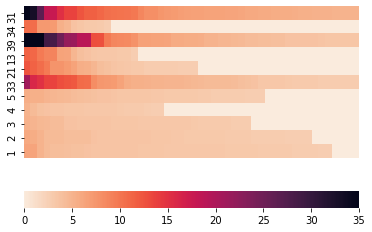

In [45]:

ytick=['31','34','39','13','21','33','5','4','3','2','1']
ax = sns.heatmap([inf_AMS1, inf_AMS2, inf_AMS3,ninf_AMS1, ninf_AMS2, ninf_AMS3, WF_AMS5, WF_AMS4, WF_AMS3, WF_AMS2, WF_AMS1], vmin=0, vmax=35,cmap="rocket_r", yticklabels=ytick, xticklabels=False, cbar_kws={"orientation": "horizontal"})
fig = ax.get_figure()
#fig.savefig("heatmap.svg", transparent=True)

In [122]:
AMS1=sum(heatmap_WF['AMS1'])
AMS2=sum(heatmap_WF['AMS2'])
AMS3=sum(heatmap_WF['AMS3'])
AMS4=sum(heatmap_WF['AMS4'])
AMS5=sum(heatmap_WF['AMS5'])
print(AMS1, AMS2, AMS3, AMS4, AMS5)

AMS_mean=np.mean([AMS1, AMS2, AMS3, AMS4, AMS5])
AMS_std=np.std([AMS1, AMS2, AMS3, AMS4, AMS5], ddof=1)
print(AMS_mean, AMS_std)

164.70652399999997 154.49354900000003 121.88631500000001 68.78301599999999 129.28122199999999
127.8301252 37.399206621559394


In [123]:
AMS1=sum(heatmap_inf['AMS1'])
AMS2=sum(heatmap_inf['AMS2'])
AMS3=sum(heatmap_inf['AMS3'])

print(AMS1, AMS2, AMS3)

AMS_mean=np.mean([AMS1, AMS2, AMS3])
AMS_std=np.std([AMS1, AMS2, AMS3], ddof=1)
print(AMS_mean, AMS_std)

709.641828 72.95069499999998 613.0255310000003
465.20601800000014 343.12076012371193


In [124]:
AMS1=sum(heatmap_ninf['AMS1'])
AMS2=sum(heatmap_ninf['AMS2'])
AMS3=sum(heatmap_ninf['AMS3'])

print(AMS1, AMS2, AMS3)

AMS_mean=np.mean([AMS1, AMS2, AMS3])
AMS_std=np.std([AMS1, AMS2, AMS3], ddof=1)
print(AMS_mean, AMS_std)

98.75932100000001 134.054304 344.92224099999993
192.578622 133.10848073565947
